## Step 1.  is to visualize the ECoG datasets of the Mouse, from .abf files and write it to excel

In [1]:
import pyabf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

#List with name of the ECoG files
List_of_files = ["131010_002[1-425]",
                 "131010_003[1-411]",
                 "131011_002[1-432]",
                 "131011_003[1-300]",
                 "131015_001[1-1324]",
                 "131018_004[1-375]",
                 "131024_001.1[1-258]",
                 "131028_001[1-320]",
                 "131029_003[1-289]",
                 "131029_004[1-188]",
                 "131031_001[1-336]",
                 "131103_001[1-454]",
                 "131104_001[1-517]",
                 "131104_002[1-415]"                
                ]

file = ["131010_002[1-425]"]

#read .abf file and obtain time series information about the dataset
def read_abf(abf):
    time = np.array([])                        
    action_potential = np.array([])
    
    #print(abf.headerText)
    for sweep in  abf.sweepList:                  #sweep - is a time window of the signal                        
        abf.setSweep(sweep, absoluteTime = True)
        #write the continious file (time)
        time = np.concatenate((time,abf.sweepX)) 
        #write the continious file (potential pA values)
        action_potential = np.concatenate((action_potential, abf.sweepY))
    return time, action_potential

print("Done preparation of .abf")

Done preparation of .abf


#### Convert .abf to .xlsx

In [ ]:
def convert_abf_to_xls (name_List):
    for name in name_List:
        abf = pyabf.ABF(name + ".abf")
        print(abf)
        dataRate = abf.dataRate
        data = read_abf(abf)
        print("read data")
        #create dataframe with the continious signal
        data_set = pd.DataFrame({'time':data[0], 'U,pA':data[1]})
        print("create data_set")
        #write to excel t and U
        data_set.to_excel(name +".xlsx", index = False)
        print("Done file" + name)
        plt.plot(data[0],data[1])
        plt.show()
        plt.savefig(name+".png")
        print("Image #" + name + "is saved")

convert_abf_to_xls(file)
print("Done convert .abf to .xlsx")

#### Label datasets

In [38]:
import numpy as np
import pandas as pd
import pyabf 


name = ["131010_002[1-425]"]


List_of_files = ["131010_002[1-425]",
                 "131010_003[1-411]",
                 "131011_002[1-432]",
                 "131011_003[1-300]",
                 "131015_001[1-1324]",
                 "131018_004[1-375]",
                 "131024_001.1[1-258]",
                 "131028_001[1-320]",
                 "131029_003[1-289]",
                 "131029_004[1-188]",
                 "131031_001[1-336]",
                 "131103_001[1-454]",
                 "131104_001[1-517]",
                 "131104_002[1-415]"                
                ]

Time_of_seizures = [
                    [(680,780), (820,940), (1000, 1250), (1600,1680), (1890,2050),(2100,2600),(2650,2850),(2900,3400)],
                    [(0,3000)],
                    [(700,740)],
                    [(1600,1720)],
                    [(4800,5800), (6600,7400), (7500,8500), (9000,9500),(9600,10200)],
                    [(2200,2600), (3400,3550)],
                    [(200,350), (450,540), (640,720),(760,805),(850,1100),(1200,2500)],
                    [(2800,3200)],
                    [(1700,2100)],
                    [(420,460),(500,640),(690,810),(910,990),(1050,1300),(1600,1850)],
                    [(1200,1800),(2000,2700),(2700,3100),(3150,3350)],
                    [(1220,1260),(3120,3160)],
                    [(1210,1250)],
                    [(2310,2350),(3650,3750)]                   
]

Seizure_data_frame = pd.DataFrame({"names":List_of_files , "seizure periods": Time_of_seizures})
print(Seizure_data_frame)

name = ["131010_002[1-425]"]

#Labels dataset when the seizures occured in different point of time (0 - no seizure, 1 - seizure)
def create_label_vector (file_name, seizure_data_frame, time_step, t):
    for n in range(len(seizure_data_frame["names"])):              #number of files in dataframe
        if seizure_data_frame.iloc[n,0] == file_name:              #find the specific file name
            print("Name of file is " + file_name)
            seizures_time = seizure_data_frame.iloc[n,1]           #for file_name read the array with time points of seizures      
            temp_vect = np.array(seizures_time)                #put it in numpy array
            #temp_vect = seizures_time.flatten()                    #concatanate this array
            print("This is time_seizure array")
            print(temp_vect)
            n_row = len(temp_vect); n_col = len(temp_vect[0])      #number of rows and col of this array
            print("Rows:" + str(n_row) + " and columns: "+str(n_col))
            labeled_data = np.zeros(len(t))
            for i in range(n_row):
                start_index = int(round(temp_vect[i,0]/time_step))
                end_index = int(round(temp_vect[i,1]/time_step))
                labeled_data[start_index:end_index] = 1
            print("Label vector is created !")
    return labeled_data

def write_label_data_to_xls (name, time, u_signal, labels):
        data_set = pd.DataFrame({"time":time, "U,pA":u_signal, "labels": labels})
        print("Created labeled data_set")
        #write to excel t, U and labels
        data_set.to_excel(name +"_labeled.xlsx", index = False)
        print("Done file" + name)
        
for n in name:
    abf = pyabf.ABF(n + ".abf")
    sampleRate = abf.dataRate
    time_step = round((1/sampleRate), 4)
    data_set = read_abf(abf)
    t = data_set[0]; u = data_set[1]
    labels = create_label_vector(n, Seizure_data_frame,time_step, t)
    write_label_data_to_xls(n,t,u,labels)
    print("Wrote the labeled dataset. Done!")



                  names                                    seizure periods
0     131010_002[1-425]  [(680, 780), (820, 940), (1000, 1250), (1600, ...
1     131010_003[1-411]                                        [(0, 3000)]
2     131011_002[1-432]                                       [(700, 740)]
3     131011_003[1-300]                                     [(1600, 1720)]
4    131015_001[1-1324]  [(4800, 5800), (6600, 7400), (7500, 8500), (90...
5     131018_004[1-375]                       [(2200, 2600), (3400, 3550)]
6   131024_001.1[1-258]  [(200, 350), (450, 540), (640, 720), (760, 805...
7     131028_001[1-320]                                     [(2800, 3200)]
8     131029_003[1-289]                                     [(1700, 2100)]
9     131029_004[1-188]  [(420, 460), (500, 640), (690, 810), (910, 990...
10    131031_001[1-336]  [(1200, 1800), (2000, 2700), (2700, 3100), (31...
11    131103_001[1-454]                       [(1220, 1260), (3120, 3160)]
12    131104_001[1-517]  

## Step 2. Open excel file and do Preprocessing

#### Open .xlsx file

In [5]:
from IPython.core.debugger import set_trace #debugger for jupyter notebook
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import scipy
from sklearn import preprocessing

List_of_files = ["131010_002[1-425]",
                 "131010_003[1-411]",
                 "131011_002[1-432]",
                 "131011_003[1-300]",
                 "131015_001[1-1324]",
                 "131018_004[1-375]",
                 "131024_001.1[1-258]",
                 "131028_001[1-320]",
                 "131029_003[1-289]",
                 "131029_004[1-188]",
                 "131031_001[1-336]",
                 "131103_001[1-454]",
                 "131104_001[1-517]",
                 "131104_002[1-415]"                
                ]

List_of_labeled_files = []
file_name = "131010_002[1-425]_labeled.xlsx"

#create a List of name with "_labeled.xlsx"
for i in range(len(List_of_files)):
    List_of_labeled_files = List_of_files[i] + "_labeled.xlsx"
print("Done  List_of_labeled_files rename !")

#function read and open the excel file
def open_excel (file_name):
                print("Start to read files")
                file = pd.read_excel(file_name)
                data = np.asarray(file)
                print("Read excel file")
                return data

#data_set = open_excel(file_name) #numpy_array
data_set = open_excel(file_name) #numpy_array
print(type(data_set))

Done  List_of_labeled_files rename !
Start to read files
Read excel file
<class 'numpy.ndarray'>


#### Preprocess and plot the data

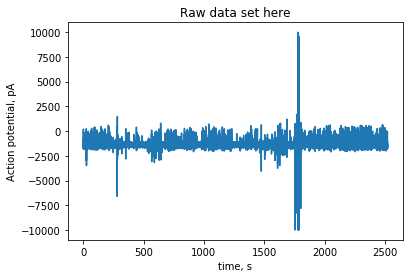

Plot std t and u 


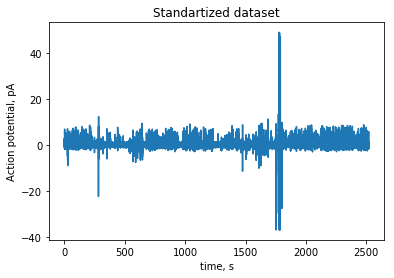

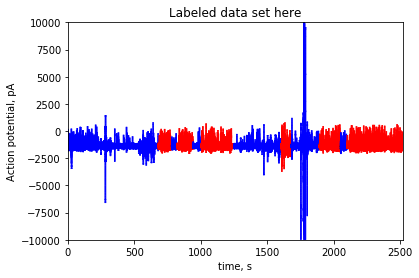

Plot std t and u 


In [83]:
import pandas as pd 

#function plot the time series (x,y)
def plot_data(t_,u_, title):
                plt.title(title)
                plt.plot(t_,u_)
                plt.xlabel("time, s")
                plt.ylabel("Action potential, pA")
                plt.show()

#function plot time series and show in red when seizure is occured
def plot_labeled_data(t_l, u_l, l_l, title):
    data_frame = pd.DataFrame({"t": t_l, "u": u_l, "label": l_l }) 
    num_classes = 2
    cmap = ListedColormap(['b','r'])
    norm = BoundaryNorm(range(num_classes+1), cmap.N)  
    points = np.array([data_frame["t"], data_frame["u"]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(data_frame["label"])    
    fig1 = plt.figure()
    plt.gca().add_collection(lc)
    plt.xlim(data_frame["t"].min(), data_frame["t"].max())
    plt.ylim(data_frame["u"].min(), data_frame["u"].max())
    plt.title(title)
    plt.xlabel("time, s")
    plt.ylabel("Action potential, pA")    
    plt.show() 
    
#function that remove all missing values and replace it with mean values
def check_missing_values(data_set, col2use):
    for n_of_col in col2use:
        x_mean = np.mean(data_set[:,n_of_col])
        data_set[:,n_of_col] = data_set[:,n_of_col].fillna(x_mean)
    return data_set

# a function for standartize and plot data set
def preprocess_dataset(data_set):
    t = data_set[:,0]
    u = data_set[:,1]
    plot_data(t,u,"Raw data set here")  
    # remove mean and scaling to unit variance
    #x_std = (x-x_mean)/standart deviation, if (x_1,x_2,x_3, ...)
    # scaled_data_set = StandardScaler().fit_transform(data_set)
    t_std = t
    u_std =  preprocessing.scale(u)
    print("Plot std t and u ")
    plot_data(t_std, u_std, "Standartized dataset")
    return t_std, u_std

# a function for standartize and plot labeled data set
def preprocess_labeled_dataset(data_set):
    t = data_set[:,0]
    u = data_set[:,1]
    l = data_set[:,2]
    plot_labeled_data(t, u, l, "Labeled data set here")
    # remove mean and scaling to unit variance
    #x_std = (x-x_mean)/standart deviation, if (x_1,x_2,x_3, ...)
    # scaled_data_set = StandardScaler().fit_transform(data_set)
    t_std = t
    u_std =  preprocessing.scale(u)
    print("Plot std t and u ")
    plot_labeled_data(t_std,u_std,l, "Standartized labeled dataset")
    return t_std, u_std

#data_set = check_missing_values(data_set)

#preprocess and plot time series (time, action potential)
pr_data_set = preprocess_dataset(data_set)

#preprocess and plot time series with seizures marked in red 
pr_labeled_data_set = preprocess_labeled_dataset(data_set)

   ## Step 3. Data Analysis. Feature creation and extraction

#### First split the data set in non-seizured and seizured. Also split in defined window

In [13]:
import pywt
import pywt.data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


pr_data_set = data_set
print("This is data_set")
print(data_set)
t_pr = pr_data_set[0]
u_pr = pr_data_set[1]
#plot_data(t_pr,u_pr, "Original Signal")
data_u = u_pr

#function to split data in non-seizured and non-seizured chunks
def split_data_based_on_labels(labeled_data_set):
    b=[] ; c= []; d = [] #temporary arrays to split the data
    #when label 0 - we put all of the dataset in array, if label 1 - in another
    
    t = labeled_data_set[:,0]
    u = labeled_data_set[:,1]
    l = labeled_data_set[:,2]
    combined = np.vstack((l, u)).T   #combine label and potential U
    temp_set = np.split(combined, np.where(np.diff(combined[:,0]))[0]+1)
    
    #temp_set is a 3d array. So because we have binary classification
    #so we divide signal in non-seizure and seizured sets
    for i in range(len(temp_set)):
        a = temp_set[i]
        mod = i%2
        if mod > 0:
            print("label 1")
            b = a[:,1:3]  #[1:3] time and u
            c.append(b)
            d.append(1)
        else:
            print("label 0")
            b = a[:,1:3]
            c.append(b)
            d.append(0)
    splited_labeled_df = pd.DataFrame({"U,pA": c, "label": d})
    return splited_labeled_df


print("This is splited labeled data set")
splited_data_set = split_data_based_on_labels(data_set)
print(splited_data_set)


#def window_split_data (data_set)

This is data_set
[[ 0.00000000e+00 -1.44897461e+03  0.00000000e+00]
 [ 2.40384615e-03 -1.44897461e+03  0.00000000e+00]
 [ 4.80769231e-03 -1.43188477e+03  0.00000000e+00]
 ...
 [ 2.52060577e+03 -1.42211914e+03  1.00000000e+00]
 [ 2.52060817e+03 -1.42089844e+03  1.00000000e+00]
 [ 2.52061058e+03 -1.42944336e+03  1.00000000e+00]]
This is splited labeled data set
label 0
label 1
label 0
label 1
label 0
label 1
label 0
label 1
label 0
label 1
label 0
label 1
                                                 U,pA  label
0   [[-1448.974609375], [-1448.974609375], [-1431....      0
1   [[-1646.728515625], [-1662.59765625], [-1667.4...      1
2   [[-1456.298828125], [-1439.208984375], [-1392....      0
3   [[-1370.849609375], [-1400.146484375], [-1418....      1
4   [[-1324.462890625], [-1300.048828125], [-1339....      0
5   [[-1405.029296875], [-1423.33984375], [-1394.0...      1
6   [[-1442.87109375], [-1452.63671875], [-1423.33...      0
7   [[-1368.408203125], [-1400.146484375], [-1439.... 

In [3]:
import numpy as np
import pandas as pd

a = [1,2,3,7,4]
b = [5,6,7,8,8]
c = [0,0,1,0,1]

n = np.vstack((c, a, b)).T
print("Just N")
print(n)
n_s = np.split(n, np.where(np.diff(n[:,0]))[0]+1)
gg = []
print("Just N_s")
print(n_s)

a = n_s[0]
a = np.asarray(a)
b = a[0]
c = []
l = []
print(a[:,1:3])

for i in range(len(n_s)):
    a = n_s[i]
    mod = i%2
    if mod > 0:
            print("label 1")
            b = a[:,1:3]
            print(b)
            c.append(b)
            l.append(1)
    else:
            print("label 0")
            b = a[:,1:3]
            print(b)
            c.append(b)
            l.append(0)
splited_labeled_df = pd.DataFrame({"U,pA": c, "label": l})
print(c)
print(l)
print(splited_labeled_df)

Just N
[[0 1 5]
 [0 2 6]
 [1 3 7]
 [0 7 8]
 [1 4 8]]
Just N_s
[array([[0, 1, 5],
       [0, 2, 6]]), array([[1, 3, 7]]), array([[0, 7, 8]]), array([[1, 4, 8]])]
[[1 5]
 [2 6]]
label 0
[[1 5]
 [2 6]]
label 1
[[3 7]]
label 0
[[7 8]]
label 1
[[4 8]]
[array([[1, 5],
       [2, 6]]), array([[3, 7]]), array([[7, 8]]), array([[4, 8]])]
[0, 1, 0, 1]
               U,pA  label
0  [[1, 5], [2, 6]]      0
1          [[3, 7]]      1
2          [[7, 8]]      0
3          [[4, 8]]      1


### Features Development

In [14]:
import numpy as np
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt

#time-series analysis of data from neuroscience experiments
#http://nipy.org/nitime/
#from nitime import utils
#from nitime import algorithms as alg
#from nitime.timeseries import TimeSeries
#from nitime.viz import plot_tseries
#https://python-scripts.com/import-csv-python

import csv 
import pywt
import scipy.stats as sp
from spectrum import *
from os import listdir
from os.path import isfile, join


feature_names = ["Activity", "Mobility", "complexity", "mean_signal", "std_signal",
                "mean_square_signal", "Skewness", "WvMean", "WvStdDeviation", "WvApprEnergy", 
                 "FFTPowerDelta", "FFTPowerTheta", "FFTPowerAlpha", "FFTPowerBeta"]

#### I. Hjorth Parameters

In [29]:
#https://en.wikipedia.org/wiki/Hjorth_parameters
#main formulas of Hjorth parameters
import numpy as np
import pandas as pd

print("This is splited data sets")
print(splited_data_set["U,pA"])
splited_data_u = np.asarray(splited_data_set["U,pA"])
print("Length of the array is ")
print(len(splited_data_u))

def hjorth(u_input):
    hjorth_activity = np.zeros(len(u_input))
    hjorth_mobility = np.zeros(len(u_input))
    hjorth_diffmobility = np.zeros(len(u_input))
    hjorth_complexity = np.zeros(len(u_input))
    
    for k in range(len(u_input)):
        diff_u_input = np.diff(u_input[k]) #x[n+1] - x[n]
        diff_u_diffinput = np.diff(diff_u_input[k])
        for x in u_input:
            hjorth_activity[k] = np.var(x) #var = mean(abs(x - x.mean())**2)
            hjorth_mobility[k] = np.sqrt(np.var(diff_u_input[k])/hjorth_activity[k])
            hjorth_diffmobility[k] = np.sqrt(np.var(diff_u_diffinput[k])/np.var(diff_u_input[k]))
            hjorth_complexity[k] = hjorth_diffmobility[k]/hjorth_mobility[k]        
    return hjorth_activity, hjorth_mobility, hjorth_complexity

hjorth(splited_data_u)

#for i in range(len(splited_data_u))):
 #   temp = 

This is splited data sets
0     [[-1448.974609375], [-1448.974609375], [-1431....
1     [[-1646.728515625], [-1662.59765625], [-1667.4...
2     [[-1456.298828125], [-1439.208984375], [-1392....
3     [[-1370.849609375], [-1400.146484375], [-1418....
4     [[-1324.462890625], [-1300.048828125], [-1339....
5     [[-1405.029296875], [-1423.33984375], [-1394.0...
6     [[-1442.87109375], [-1452.63671875], [-1423.33...
7     [[-1368.408203125], [-1400.146484375], [-1439....
8     [[-1544.189453125], [-1513.671875], [-1506.347...
9     [[-1553.955078125], [-1544.189453125], [-1483....
10    [[-1229.248046875], [-1250.0], [-1199.95117187...
11    [[-1368.408203125], [-1391.6015625], [-1403.80...
Name: U,pA, dtype: object
Length of the array is 
12


C:\Users\v.gaidar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\v.gaidar\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\v.gaidar\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: index 0 is out of bounds for axis 0 with size 0

### Time-frequency domain (Discrete Wavelet Transform)

In [64]:
import numpy as np
import pandas as pd
name = "131010_002[1-425]"


print("This is splited data sets")
print(splited_data_set["U,pA"])
splited_data_u = np.asarray(splited_data_set["U,pA"])
print("Length of the array is ")
print(len(splited_data_u))
print(splited_data_u[0])

# -------------- Time domain ----------------# 
def mean_signal(u_x, e):
    return np.mean(u_x)

def std_signal(u_x, e):
    return np.std(u_x)

def mean_square_signal(u_x, e):
    return np.mean(u_x ** 2)

def abs_diffs_signal(u_x, e):
    return np.sum(np.abs(np.diff(u_x)))

def skew_signal(u_x, e):
    return scipy.stats.skew(u_x)

mean =[]; std =[];  mean_square =[]; skew =[] #all features for data
error = 0.1

for i in range(len(splited_data_u)):
    u = splited_data_u[i]
    mean.append(mean_signal(u,error))
    std.append(mean_signal(u,error))
    mean_square.append(mean_signal(u,error))
    skew.append(mean_signal(u,error))

# -------------- Frequency domain ----------------#
#band power - average power of a signal in a specific frequency range
# Discrete Wavelet Analysis: cA - approximate coeff, cD - detailed coefficent
import pywt
cA = []; cD =[] ; #wavelet coff for each splited timeset
cA_mean = []; cD_mean =[];  #all wavelet coeff for data
cA_std = []; cD_std =[];
cA_energy = []; cD_energy =[];

def do_discrete_wavelet(u_x):
    (cA, cD) = pywt.dwt(u_x, 'db5')
    print(cA)
    print(cD)
    return cA, cD

for i in range(len(splited_data_u)):
    u = splited_data_u[i]
    wv_coeff = do_discrete_wavelet(u)
    cA.append(wv_coeff[0])
    cD.append(wv_coeff[1])
print("Created cA and cD !")
'''
print("Print discrete wavelet transfom coeff")
print("Print cA")
print(cA) #print approximate u for all datasets
print("Print cD")
print(cD) #print detailed u for all datasets
   
print("len of cA"); print(len(cA))
print("len of cD"); print(len(cD))
'''

# Discrete Wavelet Analysis: different characteristic 
def dwt_mean (c):
    return np.mean(c)

def dwt_std (c):
    return np.std(c)

def dwt_energy (c):
    return np.sum(np.square(c))

for i in range(len(splited_data_u)):
    u = splited_data_u[i]
    cA_mean.append(dwt_mean(cA[i]))
    cD_mean.append(dwt_mean(cD[i]))
    cA_std.append(dwt_std(cA[i]))
    cD_std.append(dwt_std(cD[i]))
    cA_energy.append(dwt_energy(cA[i]))
    cD_energy.append(dwt_energy(cD[i]))
print("Created cA and cD characteristic !")

#create data frame with all features
feature_names = ["mean_signal", "std_signal","mean_square_signal", "Skewness", "WvMean_cA",
         "WvMean_cD", "WvStdDeviation_cA","WvStdDeviation_cD",
         "WvApprEnergy_cA", "WvApprEnergy_cD"]

# ------------ Create file .xls with features ---------------------- #
names = feature_names
features_data_frame = pd.DataFrame({ 
                         names[0]: mean, names[1]: std, names[2]: mean_square, names[3]:skew, 
                         names[4]: cA_mean,   names[5]: cD_mean,
                         names[6]: cA_std,    names[7]: cD_std, 
                         names[8]: cA_energy, names[9]: cD_energy })
print(features_data_frame)
#write features_data_frame to .xlsx file 
print("Start write to features  .xlsx")
features_data_frame.to_excel(name + "_features.xlsx",index = False)
print("Done writing to features .xlsx")
# -------------------------------------------------------------------- #

# ------------ Create file .xls with labeled features ---------------------- #
labeled_features_data_frame = pd.DataFrame({ "labels": splited_data_set["label"],
                         names[0]: mean,         names[1]: std, 
                         names[2]: mean_square,  names[3]:skew, 
                         names[4]: cA_mean,      names[5]: cD_mean,
                         names[6]: cA_std,       names[7]: cD_std, 
                         names[8]: cA_energy,    names[9]: cD_energy })
print(labeled_features_data_frame)
#write features_data_frame to .xlsx file 
print("Start write to labeled features .xlsx")
labeled_features_data_frame.to_excel(name + "_features_labeled.xlsx",index = False)
print("Done writing to labeled features .xlsx")
# -------------------------------------------------------------------- #

This is splited data sets
0     [[-1448.974609375], [-1448.974609375], [-1431....
1     [[-1646.728515625], [-1662.59765625], [-1667.4...
2     [[-1456.298828125], [-1439.208984375], [-1392....
3     [[-1370.849609375], [-1400.146484375], [-1418....
4     [[-1324.462890625], [-1300.048828125], [-1339....
5     [[-1405.029296875], [-1423.33984375], [-1394.0...
6     [[-1442.87109375], [-1452.63671875], [-1423.33...
7     [[-1368.408203125], [-1400.146484375], [-1439....
8     [[-1544.189453125], [-1513.671875], [-1506.347...
9     [[-1553.955078125], [-1544.189453125], [-1483....
10    [[-1229.248046875], [-1250.0], [-1199.95117187...
11    [[-1368.408203125], [-1391.6015625], [-1403.80...
Name: U,pA, dtype: object
Length of the array is 
12
[[-1448.97460938]
 [-1448.97460938]
 [-1431.88476562]
 ...
 [-1607.66601562]
 [-1613.76953125]
 [-1610.10742188]]
[[-2049.15954411 -2049.15954411 -2049.15954411 -2049.15954411
  -2049.15954411]
 [-2049.15954411 -2049.15954411 -2049.15954411 -2049.15

[[ 7.10542736e-15  6.39488462e-14  1.20792265e-13  1.06581410e-13
   3.55271368e-14]
 [ 4.88498131e-14  1.05693232e-13  1.34114941e-13  6.30606678e-14
   6.30606678e-14]
 [-1.01252340e-13 -1.01252340e-13 -1.29674049e-13 -4.44089210e-14
  -7.99360578e-14]
 ...
 [ 8.43769499e-14  8.43769499e-14 -8.88178420e-16  4.17443857e-14
   1.16351373e-13]
 [ 4.79616347e-14 -8.88178420e-15 -3.73034936e-14 -3.73034936e-14
  -2.66453526e-14]
 [ 4.79616347e-14 -8.88178420e-15 -3.73034936e-14 -3.73034936e-14
  -2.66453526e-14]]
[[-2183.81366748 -2183.81366748 -2183.81366748 -2183.81366748
  -2183.81366748]
 [-2140.65529461 -2140.65529461 -2140.65529461 -2140.65529461
  -2140.65529461]
 [-2130.29728512 -2130.29728512 -2130.29728512 -2130.29728512
  -2130.29728512]
 ...
 [-2159.64497867 -2159.64497867 -2159.64497867 -2159.64497867
  -2159.64497867]
 [-2192.44534206 -2192.44534206 -2192.44534206 -2192.44534206
  -2192.44534206]
 [-2168.27665325 -2168.27665325 -2168.27665325 -2168.27665325
  -2168.27665325]

Done writing to labeled features .xlsx


## Step 4. Apply PCA for features extraction

[[-3.28920931e-01 -3.28920931e-01 -3.28920931e-01 -3.28920931e-01
  -3.28920931e-01 -5.45166219e-01 -1.20652182e-01 -3.36624897e-01
   2.55758959e+00  2.54345485e+00]
 [-2.39335984e-01 -2.39335984e-01 -2.39335984e-01 -2.39335984e-01
  -2.39335984e-01  4.62587660e-01 -3.38114910e-01 -2.57347399e-01
  -6.14944212e-01 -6.16490791e-01]
 [-3.56446926e-01 -3.56446926e-01 -3.56446926e-01 -3.56446926e-01
  -3.56446926e-01 -8.33592889e-02 -7.28857732e-01 -4.86605385e-01
  -9.42471258e-01 -9.49660507e-01]
 [-3.95520497e-01 -3.95520497e-01 -3.95520497e-01 -3.95520497e-01
  -3.95520497e-01 -1.79586145e+00 -3.55972507e-01 -4.56637616e-01
  -5.06005375e-01 -5.19278592e-01]
 [-1.99964143e-01 -1.99964143e-01 -1.99964143e-01 -1.99964143e-01
  -1.99964143e-01  1.07753287e-01 -6.92153361e-01 -4.87204511e-01
  -8.34393707e-01 -8.40963696e-01]
 [-3.09588930e-01 -3.09588930e-01 -3.09588930e-01 -3.09588930e-01
  -3.09588930e-01 -6.24985406e-01 -3.75669991e-01 -3.86766004e-01
   2.00144431e-01  1.93350889e-01

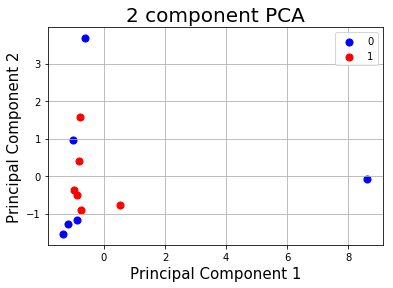

In [100]:
import pandas as pd
import numpy as np

name = "131010_002[1-425]"
file_name = name +"_features_labeled.xlsx"
feature_names = ["mean_signal", "std_signal","mean_square_signal", "Skewness", "WvMean_cA",
         "WvMean_cD", "WvStdDeviation_cA","WvStdDeviation_cD",
         "WvApprEnergy_cA", "WvApprEnergy_cD"]
all_names = ["labels","mean_signal", "std_signal","mean_square_signal", "Skewness", "WvMean_cA",
         "WvMean_cD", "WvStdDeviation_cA","WvStdDeviation_cD",
         "WvApprEnergy_cA", "WvApprEnergy_cD"]

#open and read the .xlsx file 
labeled_features_frame = pd.read_excel(file_name, names = all_names)

# ------ Standartise the data so we can do PCA on the same values ------ #
from sklearn.preprocessing import StandardScaler
features = feature_names

#separating out the features and target
x = labeled_features_frame.loc[:,features].values
y = labeled_features_frame.loc[:,"labels"].values

#Standardizing the features 
x = StandardScaler().fit_transform(x)
print(x)
# ---------------------------------------------------------------------- #

# ---------------------------- Do PCA decomposition  ------------------- #
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ["PCA 1", "PCA 2"])
finalDf = pd.concat([principalDf, labeled_features_frame[["labels"]]], axis=1)
print(finalDf)
pca1_min = min(principalDf["PCA 1"]); pca1_max = max(principalDf["PCA 1"])
print(pca1_min); print(pca1_max)
pca2_min = min(principalDf["PCA 2"]); pca2_max = max(principalDf["PCA 2"])
# ---------------------------------------------------------------------- #

# ---------------------------- Visualize PCA   ------------------- #
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#ax.set_xlim([pca1_min, pca1_max])
#ax.set_ylim([pca2_min, pca2_max])

targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf["labels"] == target
    ax.scatter(finalDf.loc[indicesToKeep, "PCA 1"]
               ,finalDf.loc[indicesToKeep, "PCA 2"]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


# ---------------------------------------------------------------------- #

## Step 5. Do SVM to divide the data set

In [158]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

name = "131010_002[1-425]"
file_name = name +"_features_labeled.xlsx"
feature_names = ["mean_signal", "std_signal","mean_square_signal", "Skewness", "WvMean_cA",
         "WvMean_cD", "WvStdDeviation_cA","WvStdDeviation_cD",
         "WvApprEnergy_cA", "WvApprEnergy_cD"]
all_names = ["labels","mean_signal", "std_signal","mean_square_signal", "Skewness", "WvMean_cA",
         "WvMean_cD", "WvStdDeviation_cA","WvStdDeviation_cD",
         "WvApprEnergy_cA", "WvApprEnergy_cD"]

#open and read the .xlsx file 
labeled_features_frame = pd.read_excel(file_name, names = all_names)

# ------   Standartise the data so we can do SVM on the same values ------ #
from sklearn.preprocessing import StandardScaler
features = feature_names

#separating out the features and target
x = labeled_features_frame.loc[:,features].values
y = labeled_features_frame.loc[:,"labels"].values

#Standardizing the features 
x = StandardScaler().fit_transform(x)
# ------------------------------------------------------------------------- #


# ------------------- Do SVM for binary classification ---------------------#
#split data set in train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, y_train.shape; 
x_test.shape, y_test.shape

#do svm transform
clf = svm.SVC(kernel='rbf',gamma=10, C=1).fit(x_train, y_train)
print("SVM scores without cross-validation")
print(clf.score(x_test, y_test))  
# ------------------------------------------------------------------------- #

# ------------------- Do SVM for binary classification with cross validation ---------------#
n_cv = 5   #number of cross validation
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='rbf',gamma=10, C=1) 
scores = cross_val_score(clf, x, y, cv=n_cv)
print("SVM scores after cross-validation")
print(scores)
#Measure accuracy from the SVM
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# ---------------------------------------------------------------------------------------- #

SVM scores without cross-validation
0.3333333333333333
SVM scores after cross-validation
[0.5 0.5 0.5 0.5 0.5]
Accuracy: 0.50 (+/- 0.00)


In [164]:
# -----------------------------Visualize SVM-----------------------------------------------#
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
import numpy as np

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
    
    
# Create a SVC classifier using an RBF kernel
clf = svm.SVC(kernel='rbf',gamma=10, C=1).fit(x_train, y_train)
# Train the classifier
clf.fit(x, y)


#plot the SVM 
plot_decision_regions(x, y, classifier=clf)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
                    
'''
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='rbf',gamma=10, C=1) 
scores = cross_val_score(model, x, y, cv=n_cv)
clf_new = model.fit(x, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = x[:, 0], x[:, 1]
print(x)
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_new, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()
'''
# ---------------------------------------------------------------------------------------- #

ValueError: X.shape[1] = 2 should be equal to 10, the number of features at training time